#                            Stock Analysis and Price Prediction

# Contents
    1. Introduction
    2. Importing libraries
    3. Reading datasets
    4. Building Models
    5. Conclusion

# Introduction
In this project we will show how to write a python program that predicts the price of stocks using a machine learning technique called Long Short-Term Memory (LSTM) as well as create a optimize portfoilo using Efficient Frontier.

We will be solve the following question:

1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks'?
5. How much value do we put at risk by investing in a particular stock?
6. Portfoilo optimization using Efficient Frontier?
7. How can we attempt to predict future stock behavior using LSTM?

# Importing Libraries

In [1]:
# here we are importing important libraries
import math
import pandas_datareader as pdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
from pandas_datareader import data as web

plt.style.use("fivethirtyeight")
sns.set_style('whitegrid')
%matplotlib inline

# Reading Dataset

Companies names and thier Ticker that we used for our Analysis
    
    1. Apple Inc. = AAPL
    2. Alphabet Inc. = GOOG
    3. Microsoft Corporation = MSFT
    4. Amazon = AMZN
    5. Facebook Inc. = FB
    6. Alibaba Group = BABA
    7. Johnson & Johnson = JNJ
    8. JPMorgon Chase & Co. = JPM
    9. ExxonMobil = XOM
    10.Bank of America = BAC
    11.WalMart Store Inc. = WMT
    12.Wells Fargo & Co. = WFC
    13.Visa Inc. = V
    14.Procter & Gamble Co. = PG
    15.Verizon Communication = VZ
    16.AT&T Inc. = T
    17.UnitedHealth Group Inc. = UNH
    18.Home Depot = HD
    19.Intel = INTC
    20.Oracle = ORCL


1. What was the change in price of the stock over time?

In [2]:
#List of ticker of companies
Tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'FB', 'BABA','JNJ', 'JPM', 'XOM', 'BAC', 'WMT', 'WFC', 'V', 'PG', 'VZ', 'T', 'UNH', 'HD', 'INTC', 'ORCL']
data = pdr.get_data_yahoo(Tech_list, start = '2015-01-01')
data

Attributes   Adj Close                                                    \
Symbols           AAPL         GOOG        MSFT         AMZN          FB   
Date                                                                       
2015-01-02   24.898552   523.373108   41.647892   308.519989   78.449997   
2015-01-05   24.197117   512.463013   41.264908   302.190002   77.190002   
2015-01-06   24.199400   500.585632   40.659245   295.290009   76.150002   
2015-01-07   24.538729   499.727997   41.175831   298.420013   76.150002   
2015-01-08   25.481558   501.303680   42.387146   300.459991   78.180000   
...                ...          ...         ...          ...         ...   
2020-11-02  108.582664  1626.030029  202.330002  3004.479980  261.359985   
2020-11-03  110.249794  1650.209961  206.429993  3048.409912  265.299988   
2020-11-04  114.752022  1749.130005  216.389999  3241.159912  287.380005   
2020-11-05  118.824997  1763.369995  223.289993  3322.000000  294.679993   
2020-11-06  118.690002  1761.750000  223.720001  3311.370117  293.410004   

Attributes                                                            ...  \
Symbols           BABA         JNJ         JPM        XOM        BAC  ...   
Date                                                                  ...   
2015-01-02  103.599998   89.316841   52.891674  72.572495  16.126829  ...   
2015-01-05  101.000000   88.693039   51.249664  70.586792  15.658340  ...   
2015-01-06  103.320000   88.257210   49.920807  70.211517  15.189854  ...   
2015-01-07  102.129997   90.205597   49.996979  70.922943  15.261930  ...   
2015-01-08  105.029999   90.914841   51.114243  72.103416  15.577259  ...   
...                ...         ...         ...        ...        ...  ...   
2020-11-02  310.839996  138.690002  100.250000  33.990002  24.080000  ...   
2020-11-03  285.570007  138.500000  103.410004  33.410000  24.690001  ...   
2020-11-04  295.709991  139.399994  100.250000  33.230000  23.680000  ...   
2020-11-05  287.750000  139.759995  104.349998  33.169998  24.610001  ...   
2020-11-06  299.950012  142.250000  102.959999  32.779999  24.309999  ...   

Attributes      Volume                                                 \
Symbols            WMT         WFC           V         PG          VZ   
Date                                                                    
2015-01-02   4501800.0  11700900.0   8389600.0  7251400.0  11421200.0   
2015-01-05   6979000.0  15000500.0  12751200.0  8626100.0  18964500.0   
2015-01-06   8205100.0  20211200.0  11070000.0  7791200.0  22950100.0   
2015-01-07   8498400.0  15714700.0   9346800.0  5986600.0  20793600.0   
2015-01-08  12713600.0  16721600.0  10443200.0  6823300.0  17617500.0   
...                ...         ...         ...        ...         ...   
2020-11-02   5525200.0  38401200.0   8057100.0  6682800.0  16086400.0   
2020-11-03   5137700.0  38427000.0   6467900.0  6244200.0  10693500.0   
2020-11-04   5975800.0  47203200.0   8102700.0  5820600.0  20785700.0   
2020-11-05   4734200.0  38319700.0   7132100.0  5673100.0  20156400.0   
2020-11-06   5373100.0  29476400.0   6179200.0  4702300.0  11982800.0   

Attributes                                                             
Symbols              T         UNH         HD        INTC        ORCL  
Date                                                                   
2015-01-02  20564000.0   3060900.0  4323700.0  23605600.0  15070200.0  
2015-01-05  30429100.0   4679000.0  5878100.0  32785000.0  18369400.0  
2015-01-06  29595800.0   3468300.0  4910100.0  30847600.0  19229500.0  
2015-01-07  31660000.0   3225800.0  5091000.0  27725200.0  13502200.0  
2015-01-08  22799800.0   5346100.0  6464600.0  31765400.0  17516900.0  
...                ...         ...        ...         ...         ...  
2020-11-02  48052100.0   4519000.0  2956400.0  33856700.0  11413200.0  
2020-11-03  33284900.0   4043900.0  3037500.0  34349500.0   8911200.0  
2020-11-04  45482700.0  10344900.0  35253

In [3]:
# Getting Adj Close of all companies
aclose = data['Adj Close']
aclose.head()

Symbols,AAPL,GOOG,MSFT,AMZN,FB,BABA,JNJ,JPM,XOM,BAC,WMT,WFC,V,PG,VZ,T,UNH,HD,INTC,ORCL
Date,,,,,,,,,,,,,,,,,,,,
2015-01-02,24.898552,523.373108,41.647892,308.519989,78.449997,103.599998,89.316841,52.891674,72.572495,16.126829,74.438179,45.060791,63.224792,75.385979,35.858070,24.135557,91.983253,90.742973,30.858051,40.292976
2015-01-05,24.197117,512.463013,41.264908,302.190002,77.190002,101.000000,88.693039,51.249664,70.586792,15.658340,74.221535,43.825119,61.829178,75.027550,35.560268,23.907534,90.468170,88.839142,30.510092,39.727905
2015-01-06,24.199400,500.585632,40.659245,295.290009,76.150002,103.320000,88.257210,49.920807,70.211517,15.189854,74.793457,42.910725,61.430756,74.685783,35.919155,23.943163,90.285606,88.567192,29.941477,39.317783
2015-01-07,24.538729,499.727997,41.175831,298.420013,76.150002,102.129997,90.205597,49.996979,70.922943,15.261930,76.777901,43.166092,62.253826,75.077545,35.687363,23.972069,91.207451,91.602760,30.569496,39.326889
2015-01-08,25.481558,501.303680,42.387146,300.459991,78.180000,105.029999,90.914841,51.114243,72.103416,15.577259,78.398384,44.121681,63.088814,75.936104,36.452274,24.210564,95.561104,93.629402,31.138117,39.563850


In [4]:
#Here is quick summary of each company Adjusted closing
aclose.describe()

Symbols,AAPL,GOOG,MSFT,AMZN,FB,BABA,JNJ,JPM,XOM,BAC,WMT,WFC,V,PG,VZ,T,UNH,HD,INTC,ORCL
count,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000
mean,44.830508,989.629712,93.918706,1332.243317,155.440984,147.108623,117.031459,84.453222,65.512932,22.361059,85.703591,44.148925,119.407277,87.545551,46.254130,29.480915,195.409120,162.498802,40.154799,44.883627
std,22.859544,286.503901,50.366276,748.490732,48.300350,58.072242,19.767887,23.494516,10.264489,6.355689,23.879519,7.693441,46.009473,21.029281,7.338566,3.210572,67.832884,50.394476,10.903665,7.225644
min,21.165979,491.201416,35.983208,286.950012,74.050003,57.389999,79.246399,46.027359,30.254938,10.177327,49.833813,21.043383,58.773144,58.065460,33.866959,23.574585,90.285606,88.567192,22.457790,31.409939
25%,27.620744,749.437500,50.817860,719.334991,117.295000,87.637501,102.013662,58.162110,64.827631,15.349942,64.925226,42.449845,76.422157,72.018744,40.358991,27.279194,127.303297,118.346483,30.591036,38.142556
50%,38.832937,1020.494995,80.868275,1163.239990,159.404999,156.320000,121.235996,89.250904,68.734856,23.359776,80.988445,46.035948,110.166294,79.118374,43.830967,29.346684,206.611694,160.416878,41.407166,45.455799
75%,51.306688,1184.845032,125.819389,1813.532471,185.177494,185.265003,131.729713,102.438078,71.781916,27.796549,100.742636,48.546030,160.145966,102.165749,53.548985,31.547525,248.543556,194.727531,48.831476,51.227889
max,133.948898,1763.369995,231.649994,3531.449951,303.910004,317.140015,153.830002,136.145889,78.264053,34.925472,147.679993,59.205624,216.479996,143.692154,59.971466,37.092419,354.559998,290.398560,66.808777,61.459999


In [5]:
# Getting Adj Close of all companies
volume = data['Volume']
volume.head()

Symbols,AAPL,GOOG,MSFT,AMZN,FB,BABA,JNJ,JPM,XOM,BAC,WMT,WFC,V,PG,VZ,T,UNH,HD,INTC,ORCL
Date,,,,,,,,,,,,,,,,,,,,
2015-01-02,212818400.0,1447500.0,27913900.0,2783200.0,18177500.0,12303400.0,5753600.0,12600000.0,10220400.0,48951100.0,4501800.0,11700900.0,8389600.0,7251400.0,11421200.0,20564000.0,3060900.0,4323700.0,23605600.0,15070200.0
2015-01-05,257142000.0,2059800.0,39673900.0,2774200.0,26452200.0,18337000.0,8079300.0,20100600.0,18502400.0,105605500.0,6979000.0,15000500.0,12751200.0,8626100.0,18964500.0,30429100.0,4679000.0,5878100.0,32785000.0,18369400.0
2015-01-06,263188400.0,2899900.0,36447900.0,3519000.0,27399300.0,15720400.0,7428000.0,29074100.0,16670700.0,144912400.0,8205100.0,20211200.0,11070000.0,7791200.0,22950100.0,29595800.0,3468300.0,4910100.0,30847600.0,19229500.0
2015-01-07,160423600.0,2065000.0,29114100.0,2640300.0,22045300.0,11052200.0,7931700.0,23843200.0,13590700.0,104603800.0,8498400.0,15714700.0,9346800.0,5986600.0,20793600.0,31660000.0,3225800.0,5091000.0,27725200.0,13502200.0
2015-01-08,237458000.0,3353500.0,29645200.0,3088400.0,23961000.0,12942100.0,9916000.0,16971100.0,15487500.0,73388500.0,12713600.0,16721600.0,10443200.0,6823300.0,17617500.0,22799800.0,5346100.0,6464600.0,31765400.0,17516900.0


2. What was the daily return of the stock on average?

In [6]:
# Calculating daily percentage change
daily_returns = data['Adj Close'].pct_change()
daily_returns.tail()

Symbols,AAPL,GOOG,MSFT,AMZN,FB,BABA,JNJ,JPM,XOM,BAC,WMT,WFC,V,PG,VZ,T,UNH,HD,INTC,ORCL
Date,,,,,,,,,,,,,,,,,,,,
2020-11-02,-0.000827,0.003097,-0.000691,-0.010431,-0.006651,0.020184,0.011524,0.022542,0.041999,0.016034,0.011892,0.020979,0.016675,0.010211,0.012458,0.011843,0.022809,0.015110,0.004065,0.006060
2020-11-03,0.015354,0.014871,0.020264,0.014621,0.015075,-0.081296,-0.001370,0.031521,-0.017064,0.025332,0.016952,0.008676,0.019487,0.019639,0.000867,0.004389,0.029638,0.024488,0.008772,0.006200
2020-11-04,0.040837,0.059944,0.048249,0.063230,0.083227,0.035508,0.006498,-0.030558,-0.005388,-0.040907,-0.005743,-0.009507,0.029893,-0.004107,-0.009177,-0.015295,0.103345,0.019288,0.018952,-0.005458
2020-11-05,0.035494,0.008141,0.031887,0.024942,0.025402,-0.026918,0.002583,0.040898,-0.001806,0.039274,0.010637,0.025253,0.018920,0.012372,0.016253,0.017382,-0.000451,0.011071,0.006833,0.003009
2020-11-06,-0.001136,-0.000919,0.001926,-0.003200,-0.004310,0.042398,0.017816,-0.013321,-0.011758,-0.012190,0.016031,-0.018809,0.004200,0.005970,0.006535,-0.002545,-0.019582,-0.005632,-0.006349,0.002471


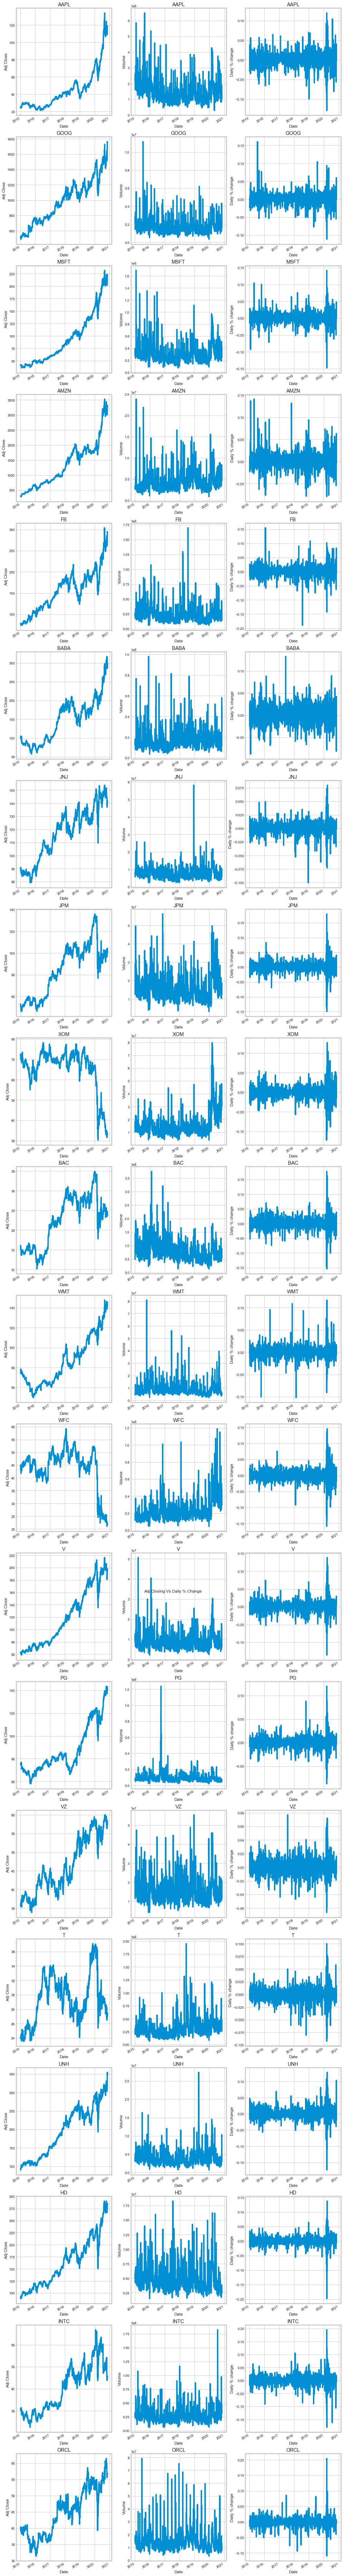

In [7]:
# here we are visualising of Adjusted Price, Volume and Daily % Change

fig, axes = plt.subplots(nrows = 20, ncols = 3)
fig.suptitle('Adj Closing Vs Daily % Change')
fig.set_figheight(50)
fig.set_figwidth(15)
plt.subplots_adjust(top=2.25, bottom=2.2)

columns = list(aclose) 
  
for i, cols in enumerate(columns,0):
    aclose[cols].plot(ax = axes[i,0])
    axes[i,0].set(xlabel='Date', ylabel='Adj Close')
    axes[i,0].set_title(f"{Tech_list[i]}")
    volume[cols].plot(ax = axes[i,1])
    axes[i,1].set(xlabel='Date', ylabel='Volume')
    axes[i,1].set_title(f"{Tech_list[i]}")
    daily_returns[cols].plot(ax = axes[i,2])
    axes[i,2].set(xlabel='Date', ylabel='Daily % change')
    axes[i,2].set_title(f"{Tech_list[i]}")

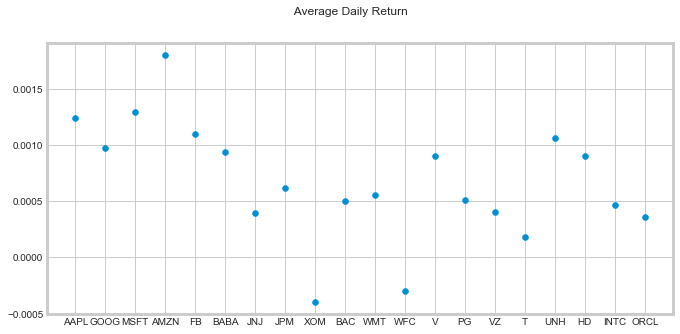

In [8]:
avg = daily_returns.mean()
plt.figure(figsize=(10, 5))
plt.scatter(columns, daily_returns.mean())
plt.suptitle(' Average Daily Return')
plt.show()

In [9]:
top_five = avg.nlargest(5)
company_name = list(top_five.keys())

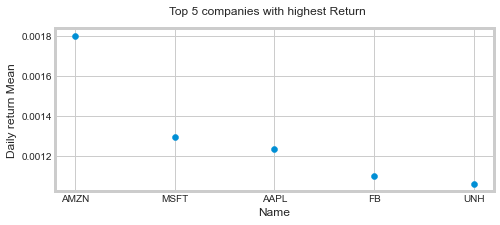

In [10]:
plt.figure(figsize=(7, 3))
plt.scatter(company_name, top_five)
plt.suptitle('Top 5 companies with highest Return')
plt.ylabel('Daily return Mean')
plt.xlabel('Name')
plt.show()

Now that we've brock down our companies from 20 to 5 on the basic of average percentage change in stock price and also seen the visualizations for the Adjusted price and the volume traded each day with daily percentage change, let's go ahead and caculate the moving average for the stock.

3. What was the moving average of the various stocks?

There are three important moving averages that we have applied to our charts so that it will help us to trade better. They are the 10 moving average, the 20 moving average and the 50 moving average. The 20 moving average (10MA) is the short-term outlook. The 50 moving average (20MA) is the medium term outlook. The 200 moving average (50MA) is the trend bias

In [21]:
# now we are using for loop for grabing yahoo data and setting it in form of dataframe
#  Using globals() is a sloppy way of setting the DataFrame names, but its simple
for stock in company_name:
    globals()[stock] = web.DataReader(stock,"yahoo",'2015-01-01',datetime.now())


In [23]:
company_list = [AMZN,AAPL,FB,MSFT,UNH]
for company, comp_name in zip(company_list,company_name):
    company["company_name"] = comp_name
    
df = pd.concat(company_list,axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2020-10-26,327.750000,318.540009,326.320007,323.059998,2408500.0,323.059998,UNH
2020-10-27,323.500000,319.429993,323.059998,320.510010,2427700.0,320.510010,UNH
2020-10-28,317.809998,307.440002,313.329987,308.000000,3301400.0,308.000000,UNH
2020-10-29,309.480011,301.459991,306.589996,303.679993,3279200.0,303.679993,UNH
2020-10-30,307.170013,299.600006,303.230011,305.140015,3556800.0,305.140015,UNH
2020-11-02,312.640015,307.359985,312.640015,312.100006,4519000.0,312.100006,UNH
2020-11-03,326.440002,315.019989,317.470001,321.350006,4043900.0,321.350006,UNH
2020-11-04,360.440002,341.140015,345.230011,354.559998,10344900.0,354.559998,UNH
2020-11-05,360.980011,349.679993,358.070007,354.399994,4786500.0,354.399994,UNH


In [27]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        
company.head()

,High,Low,Open,Close,Volume,Adj Close,company_name,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,,
2015-01-02,102.620003,100.010002,101.500000,100.779999,3060900.0,91.983253,UNH,NaN,NaN,NaN
2015-01-05,100.449997,98.750000,100.300003,99.120003,4679000.0,90.468170,UNH,NaN,NaN,NaN
2015-01-06,100.139999,98.459999,99.830002,98.919998,3468300.0,90.285606,UNH,NaN,NaN,NaN
2015-01-07,100.300003,98.919998,98.959999,99.930000,3225800.0,91.207451,UNH,NaN,NaN,NaN
2015-01-08,104.980003,100.720001,101.570000,104.699997,5346100.0,95.561104,UNH,NaN,NaN,NaN


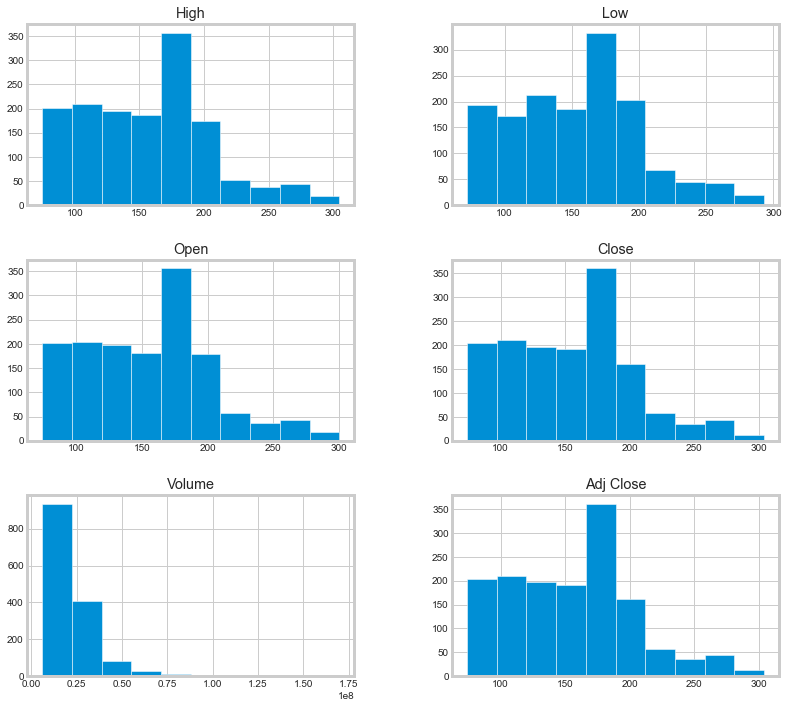

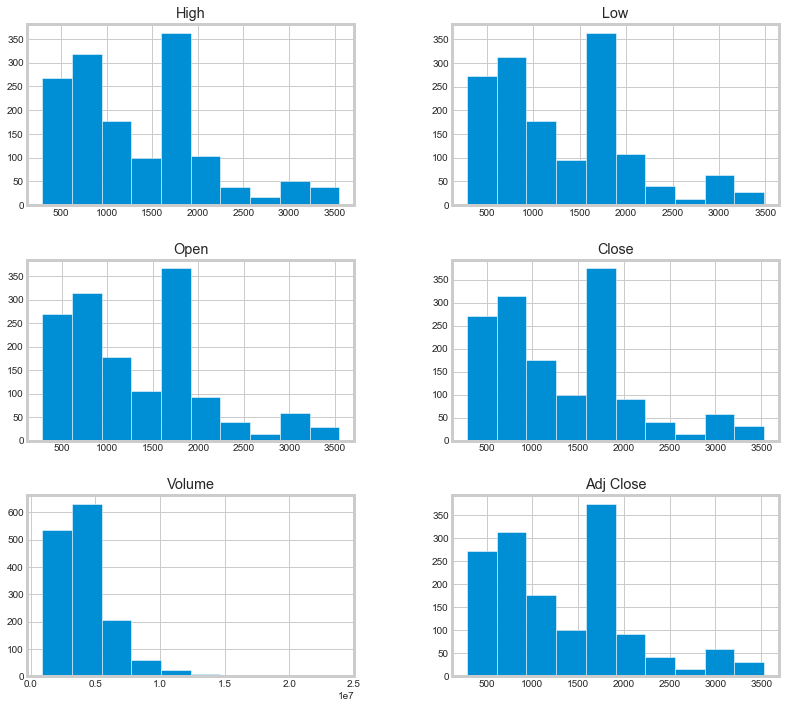

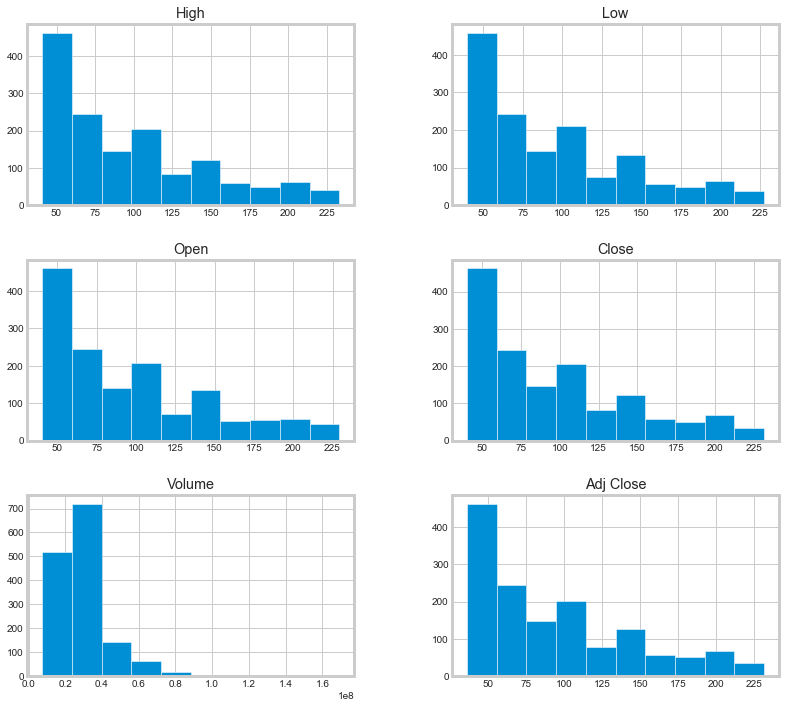

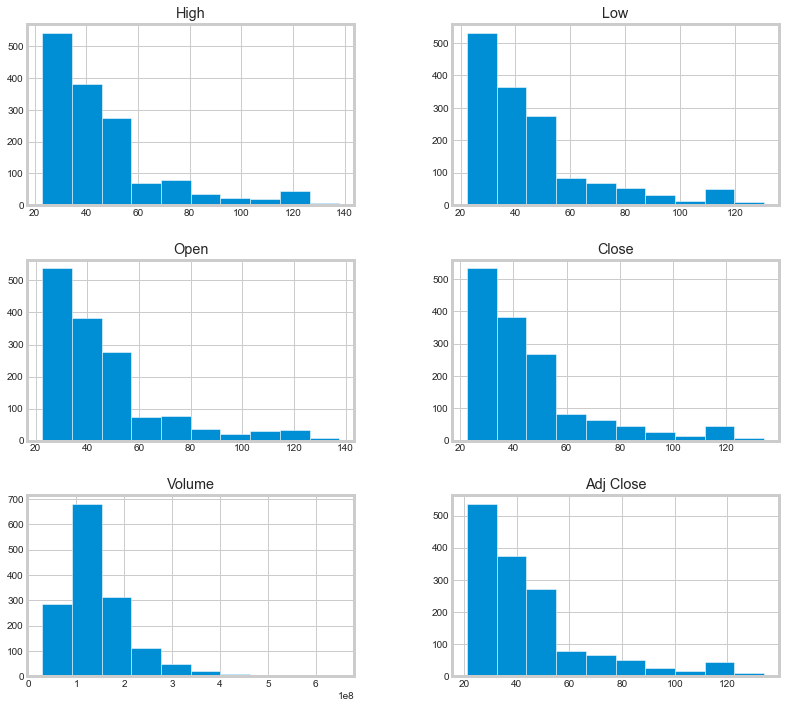

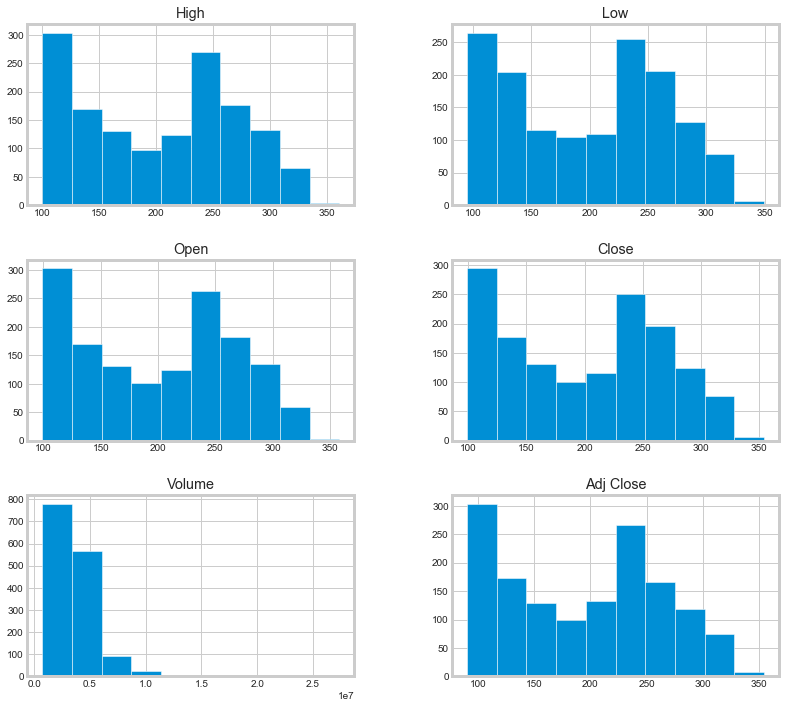

In [26]:
# here we are visualising the additional moving averages
df.groupby("company_name").hist(figsize=(12, 12));

In [28]:
AAPL.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')

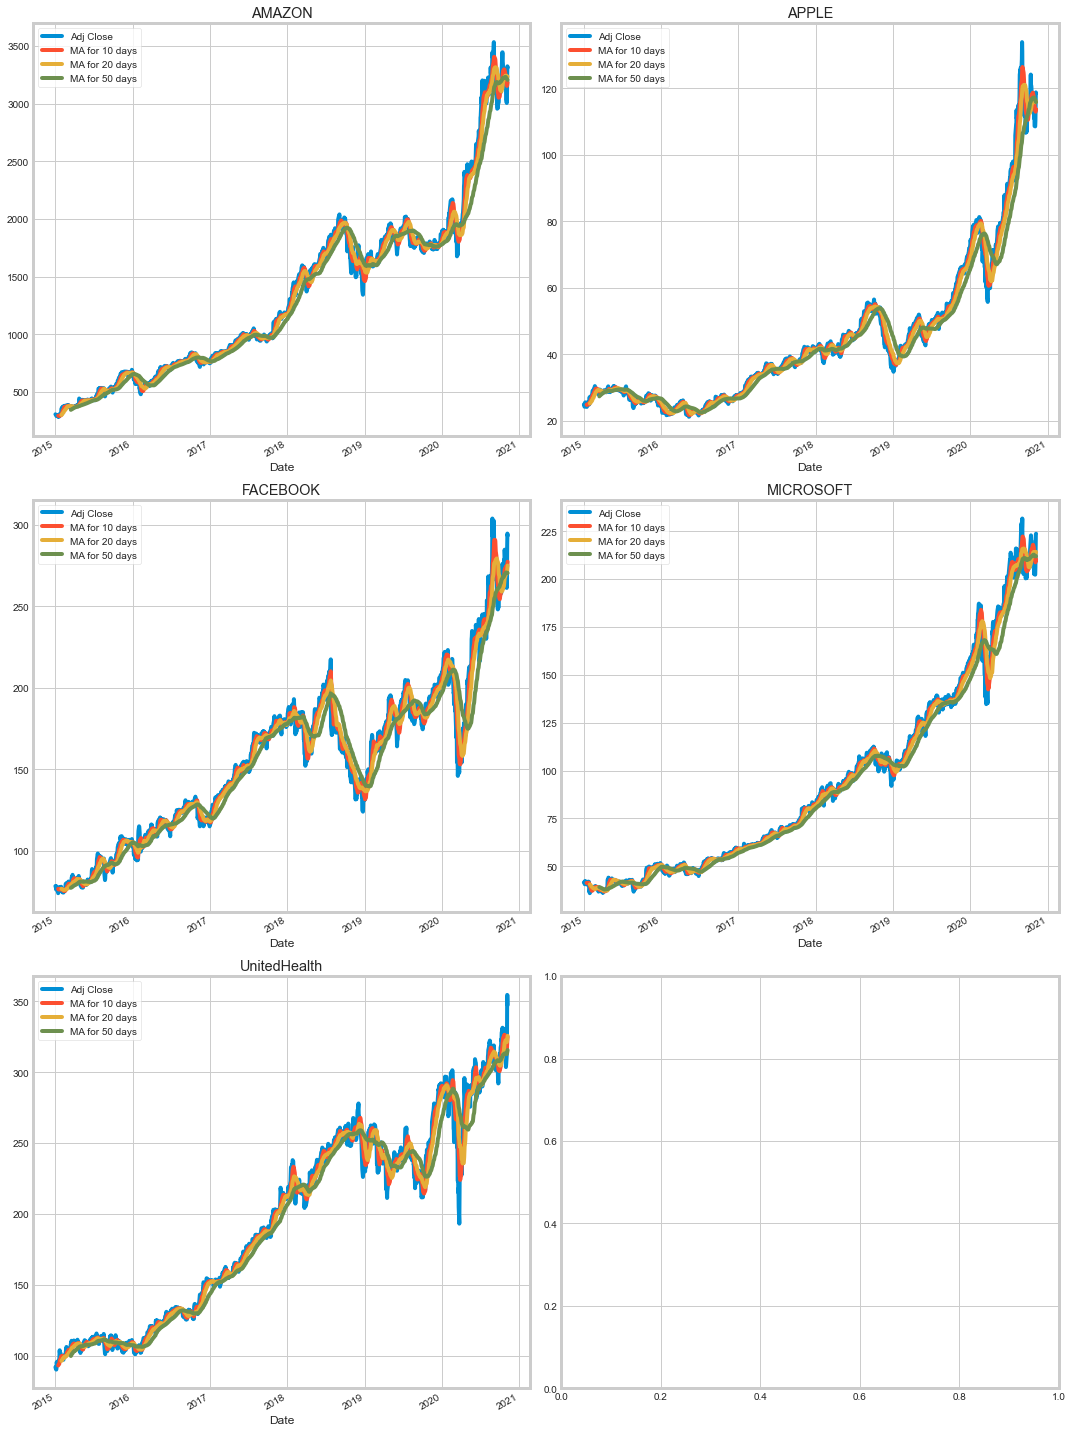

In [32]:
# here we are visualising three important moving averages of all the company
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_figheight(20)
fig.set_figwidth(15)

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('AMAZON')

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('APPLE')

FB[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('FACEBOOK')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('MICROSOFT')

UNH[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('UnitedHealth')

fig.tight_layout()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

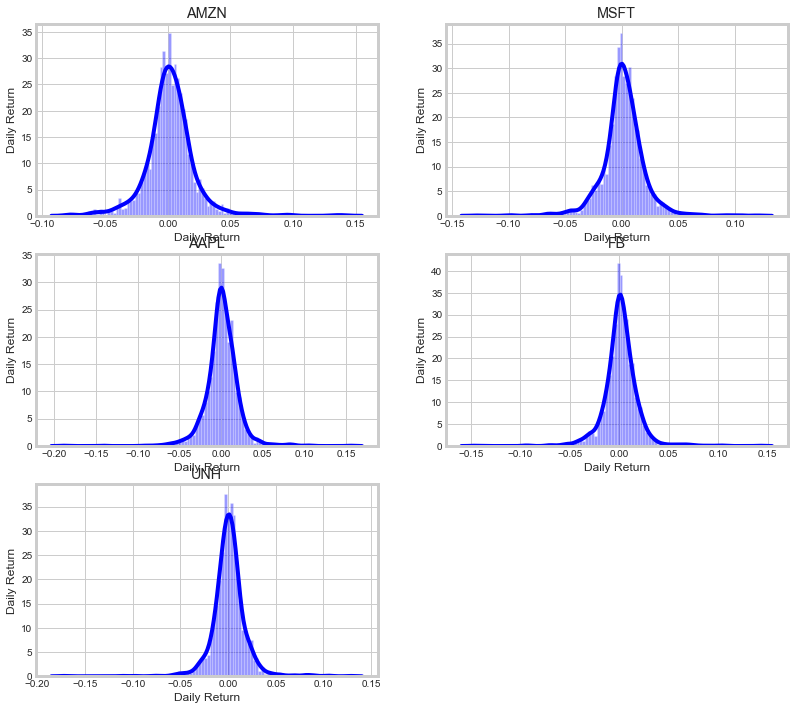

In [38]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='blue')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')

4. What was the correlation between different stocks'?

In [53]:
# Getting Top five company Adjusted Close price
aClose_five= aclose[company_name]
aClose_five.head()

Symbols,AMZN,MSFT,AAPL,FB,UNH
Date,,,,,
2015-01-02,308.519989,41.647892,24.898552,78.449997,91.983253
2015-01-05,302.190002,41.264908,24.197117,77.190002,90.468170
2015-01-06,295.290009,40.659245,24.199400,76.150002,90.285606
2015-01-07,298.420013,41.175831,24.538729,76.150002,91.207451
2015-01-08,300.459991,42.387146,25.481558,78.180000,95.561104


In [55]:
# here we are Making a new tech returns DataFrame
tech_rets = aClose_five.pct_change()
tech_rets.head()

Symbols,AMZN,MSFT,AAPL,FB,UNH
Date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.020517,-0.009196,-0.028172,-0.016061,-0.016471
2015-01-06,-0.022833,-0.014677,0.000094,-0.013473,-0.002018
2015-01-07,0.010600,0.012705,0.014022,0.000000,0.010210
2015-01-08,0.006836,0.029418,0.038422,0.026658,0.047734


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


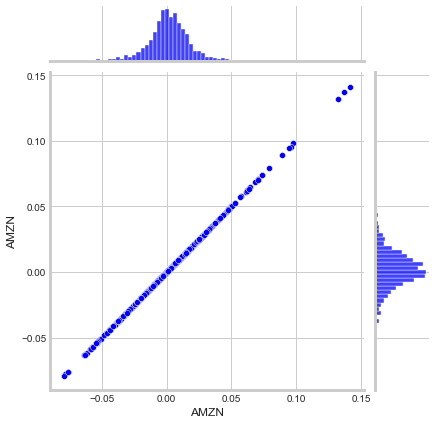

In [56]:
# here we are comparing Amazon to itself should show a perfectly linear relationship
sns.jointplot('AMZN', 'AMZN', tech_rets, kind='scatter', color = "blue")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


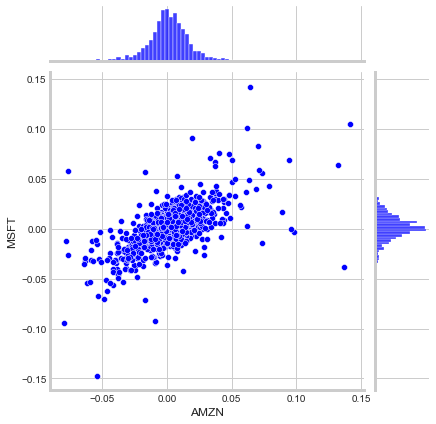

In [57]:
# here We'll use joinplot to compare the daily returns of Amazon and Microsoft
sns.jointplot('AMZN', 'MSFT', tech_rets, kind='scatter', color = "blue")

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

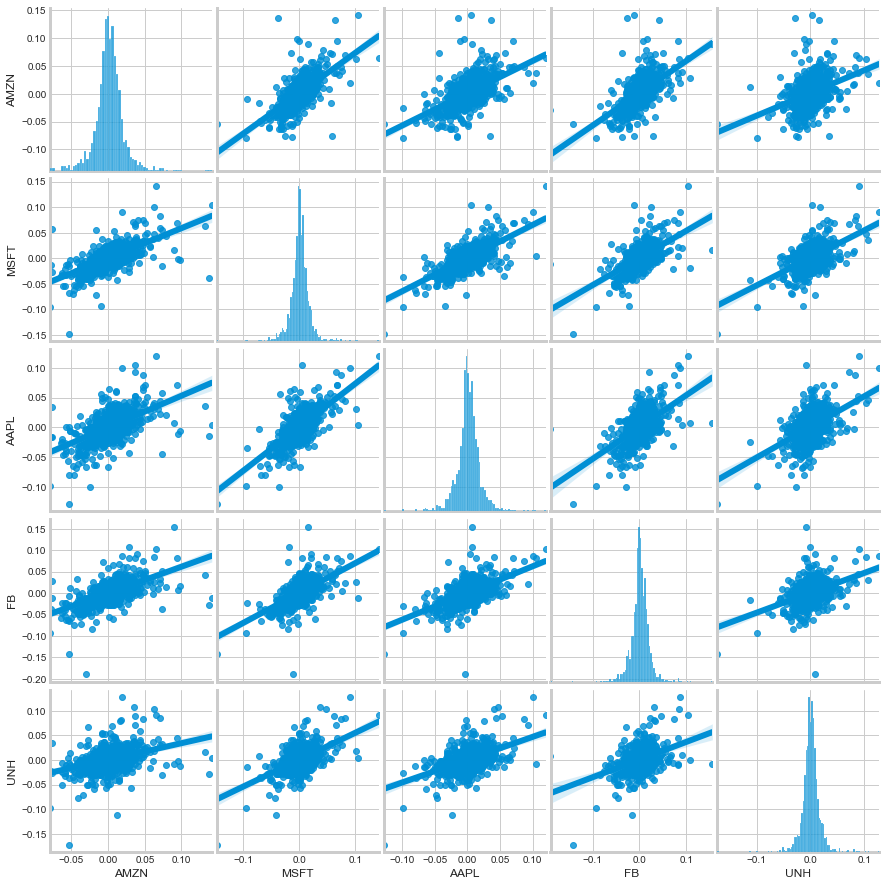

In [58]:
# Here we are simply calling pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons
sns.pairplot(tech_rets, kind='reg')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

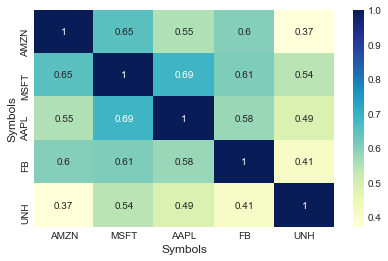

In [62]:
# Here we are using seabron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap="YlGnBu")

5. Portfoilo optimization using Efficient Frontier?

6. How much value do we put at risk by investing in a particular stock?

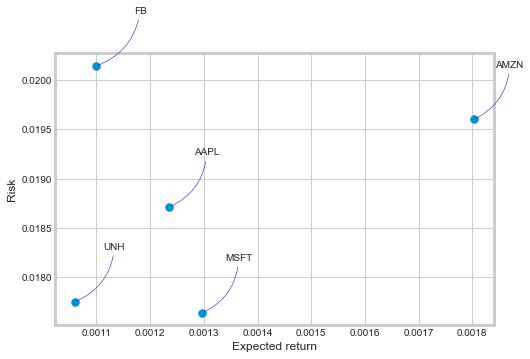

In [67]:
#Here e are defining a new DataFrame as a cleaned version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(7, 5))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

7. How can we attempt to predict future stock behavior using LSTM?

In [79]:
# Filtering the columns
df = MSFT.iloc[:,0:6]

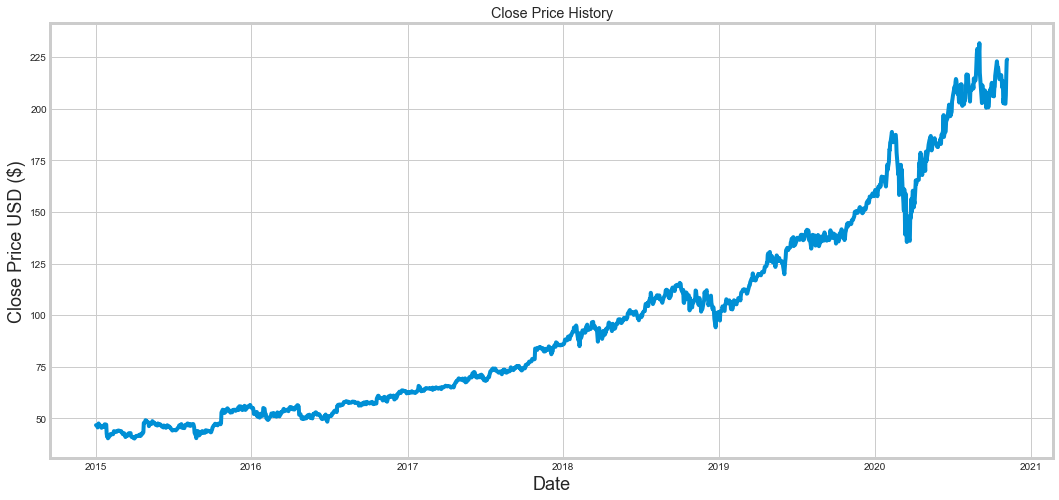

In [80]:
# here we are Visualising the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

Create a new data frame with only the closing price and convert it to an array. Then create a variable to store the length of the training data set. I want the training data set to contain about 80% of the data.

In [81]:
#Creating a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8)
training_data_len

1180

Now scale the data set to be values between 0 and 1 inclusive, I do this because it is generally good practice to scale your data before giving it to the neural network.

In [82]:
# here we are Scaling the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.03381061],
       [0.03156355],
       [0.02801004],
       ...,
       [0.92025504],
       [0.9563127 ],
       [0.95855982]])

In [83]:
#Creating the scaled training data set
train_data = scaled_data[0:training_data_len  , : ]
#Spliting the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [84]:
#Here we are Converting x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [85]:
# Here we are reshaping the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [86]:
#now we are Building the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [87]:
# here we are Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [88]:
# here we are training the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1120/1120 [==============================] - 16s 14ms/step - loss: 7.0794e-04


In [89]:
# here we are testing data set
test_data = scaled_data[training_data_len - 60: , : ]
#Creating the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [90]:
# here we are converting x_test to a numpy array  
x_test = np.array(x_test)

In [91]:
# here we are reshaping the data into the shape accepted by the LSTM  
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [92]:
# now we are getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [93]:
# here we are calculaing the value of Root Mean Square Error
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

8.005631960390074

<ipython-input-94-c1beac80e8e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


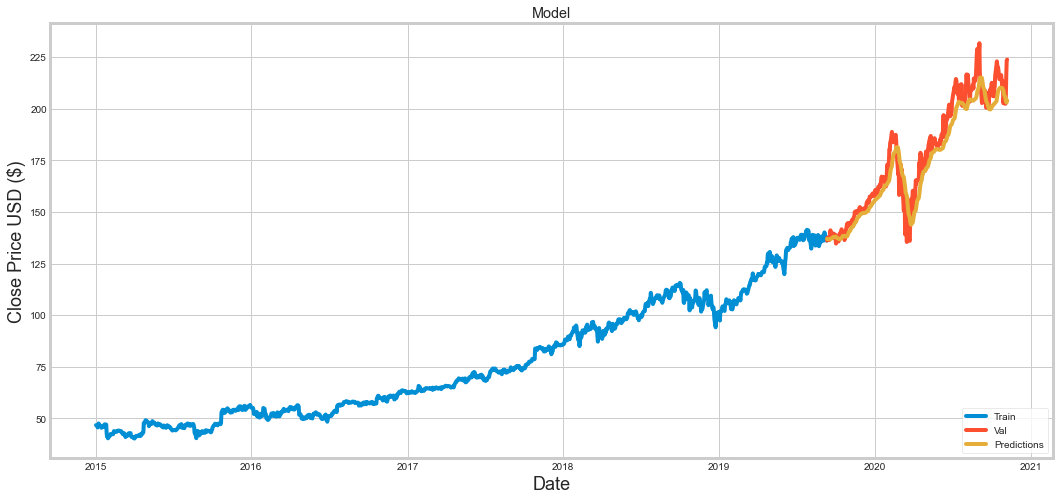

In [94]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [95]:
valid

,Close,Predictions
Date,,
2019-09-11,136.119995,136.905884
2019-09-12,137.520004,136.838562
2019-09-13,137.320007,136.807068
2019-09-16,136.330002,136.781555
2019-09-17,137.389999,136.696091
...,...,...
2020-11-02,202.330002,205.337952
2020-11-03,206.429993,204.006470
2020-11-04,216.389999,203.049393
